![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 8 - Nonparametric Estimation</center>
### <center> Empirical CDF, Histogram, and KDE</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/08_NonParametricEstimation/MainNonParametricEstimation.ipynb)

In [55]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(1)

### Generate some data from:
(GMM Model)

In [56]:
from scipy.stats import multivariate_normal

#-- N(x; mu, σ²):
def Pz(xx, vMu, mSig):
    return multivariate_normal.pdf(xx, vMu, mSig**2)

vW =         np.array([0.5,  0.2,  0.3])
vµ =         np.array([-3.0, 2.0,  3.0])
vσ = np.sqrt(np.array([2,    0.1,  0.1]))

xx   = np.linspace(-7, 6, 10001)
mPx  = np.stack([Pz(xx, vµ[ii], vσ[ii]) for ii in range(3)])
vPx  = vW @ mPx
vFx  = np.cumsum(vPx) * (xx[1] - xx[0])

N    = 1000
vIdx = np.random.choice(range(3), N, p=vW)
mX   = np.stack([vσ[ii] * np.random.randn(N) + vµ[ii] for ii in range(3)])
vX   = mX[vIdx,range(N)]

### Plot Histogram:
$$\boxed{\hat{f}_{X}\left(x\right)=\frac{1}{\left|R_{k}\right|}\frac{1}{N}\sum_{i=1}^{N}\mathbb{I}\left\{ x_{i}\in R_{k}\right\} },\qquad x\in R_{k}$$

In [57]:
mX.shape

(3, 1000)

In [58]:
from ipywidgets import interact, IntSlider, Layout

def PlotHist(K=10, N=500):
    plt.figure(figsize=(10, 5))
    plt.hist  (vX[:N], bins=K, color='b', edgecolor='k', density=True, label='Histogram')
    plt.plot  (xx,     vPx,    c='r', lw=2,                            label='$f_x$')
    plt.title (f'$K = {K}$')
    plt.legend()

kSlider = IntSlider(min=5, max=250, step=5, value=5,   layout=Layout(width='80%'))
nSlider = IntSlider(min=5, max=N,   step=5, value=500, layout=Layout(width='80%'))
interact(PlotHist, K=kSlider, N=nSlider)
plt.show()

interactive(children=(IntSlider(value=5, description='K', layout=Layout(width='80%'), max=250, min=5, step=5),…

### Plot KDE:
$$\boxed{f_{X}\left(x\right)=\frac{1}{N}\sum_{i=1}^{N}h\left(x-x_{i}\right)}$$
$$h\left(x\right)=\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left(-\frac{x^{2}}{2\sigma^{2}}\right)$$

In [59]:
from ipywidgets        import interact, FloatSlider, Layout
from sklearn.neighbors import KernelDensity

def PlotKDE(σ=1, N=100):
    if σ == 0:
        σ = 1e-2
    
    oKDE   = KernelDensity(kernel='gaussian', bandwidth=σ).fit(vX[:N,None])
    vHatPx = np.exp(oKDE.score_samples(xx[:,None]).squeeze())
    
    plt.figure(figsize=(10, 5))
    plt.plot  (xx, vHatPx, color='b', lw=2,  label='KDE')
    plt.plot  (xx, vPx,    color='r', lw=2,  label='$f_x$')
    plt.title (f'σ = {σ}')
    plt.grid  ()
    plt.legend()    

σSlider = FloatSlider(min=.00, max=1, step=.05, value=1,   layout=Layout(width='80%'))
nSlider = IntSlider  (min=5,   max=N, step=5,   value=500, layout=Layout(width='80%'))
interact(PlotKDE, σ=σSlider, N=nSlider)
plt.show()

interactive(children=(FloatSlider(value=1.0, description='σ', layout=Layout(width='80%'), max=1.0, step=0.05),…

### ECDF

###  Exercise:
* Use `vX` to compute the ECDF (on the grid `x`):
$$\hat{F}_{X}\left(x\right)=\frac{1}{N}\sum_{i=1}^{N}\mathbb{I}\left\{ x_{i}\leq x\right\} $$
Compare your result to the true CDF $F_x$: (`vFx`)
* This can be done using a very few lines (also in one line)

In [60]:
xx.shape, vX.shape, vFx.shape

((10001,), (1000,), (10001,))

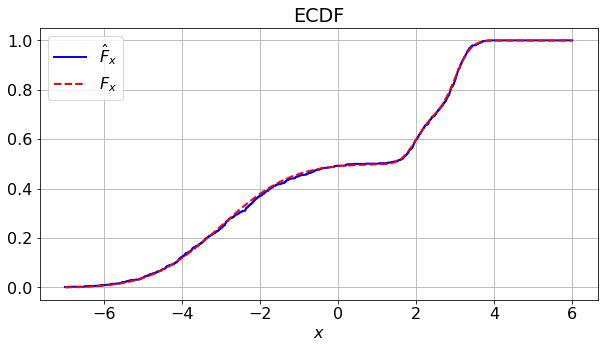

In [61]:
xx2, vHatFx2 = ecdf(vX, len(xx))
vHatFx = [np.mean(vX<xi) for xi in xx]

plt.figure(figsize=(10, 5))
plt.plot  (xx, vHatFx, color='b',  lw=2,  label='$\hat{F}_x$')
plt.plot  (xx, vFx,    'r--',      lw=2,  label='$F_x$')
plt.title ('ECDF')
plt.xlabel('$x$')
plt.legend()
plt.grid  ()
plt.show  ()

In [62]:
def ecdf(data, N):
    x = np.sort(np.resize(data, N))
    y = np.arange(1, N+1) / N
    return(x,y)

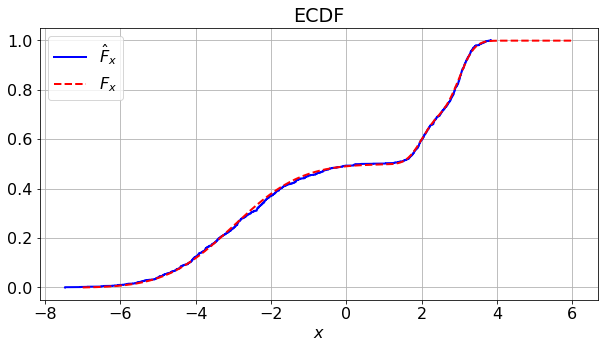

In [63]:
xx2, vHatFx2 = ecdf(vX, len(xx))

plt.figure(figsize=(10, 5))
#plt.plot  (xx, vHatFx, color='b',  lw=2,  label='$\hat{F}_x$')
plt.plot  (xx2, vHatFx2, color='b',  lw=2,  label='$\hat{F}_x$')
plt.plot  (xx, vFx,    'r--',      lw=2,  label='$F_x$')
plt.title ('ECDF')
plt.xlabel('$x$')
plt.legend()
plt.grid  ()
plt.show  ()

In [64]:
%%time
from tqdm import tqdm
vHatFx = [np.mean(vX<xi) for xi in tqdm(xx)]

100%|██████████| 10001/10001 [00:00<00:00, 39635.72it/s]Wall time: 256 ms



In [65]:
%%time
xx2, vHatFx2 = ecdf(vX, len(xx))

Wall time: 998 µs


In [66]:
%%time
vHatFx = np.mean(vX[:,None] < xx[None,:], axis=1)


Wall time: 21 ms


In [67]:
%%time
vHatFx = np.mean(xx[:,None] >= vX, 1)


Wall time: 24.9 ms
